In [3]:
import pandas as pd
import numpy as np
import seaborn as sns   # advance types(statistical,etc...)
import matplotlib.pyplot as plt  # Business level visualization

from sklearn.ensemble import IsolationForest
from ucimlrepo import fetch_ucirepo

In [ ]:
air_quality=fetch_ucirepo(id=360)

In [13]:
air_quality.data.features

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [14]:
air_quality

{'data': {'ids': None,
  'features':            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
  0     3/10/2004  18:00:00     2.6         1360       150      11.9   
  1     3/10/2004  19:00:00     2.0         1292       112       9.4   
  2     3/10/2004  20:00:00     2.2         1402        88       9.0   
  3     3/10/2004  21:00:00     2.2         1376        80       9.2   
  4     3/10/2004  22:00:00     1.6         1272        51       6.5   
  ...         ...       ...     ...          ...       ...       ...   
  9352   4/4/2005  10:00:00     3.1         1314      -200      13.5   
  9353   4/4/2005  11:00:00     2.4         1163      -200      11.4   
  9354   4/4/2005  12:00:00     2.4         1142      -200      12.4   
  9355   4/4/2005  13:00:00     2.1         1003      -200       9.5   
  9356   4/4/2005  14:00:00     2.2         1071      -200      11.9   
  
        PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
  0              1046      

In [20]:
df=air_quality.data.features

In [21]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [22]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [27]:
df.shape

(9357, 15)

In [23]:
feature=df[['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']]

In [24]:
feature.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166,113
1,2.0,9.4,103,92
2,2.2,9.0,131,114
3,2.2,9.2,172,122
4,1.6,6.5,131,116


In [25]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CO(GT)    9357 non-null   float64
 1   C6H6(GT)  9357 non-null   float64
 2   NOx(GT)   9357 non-null   int64  
 3   NO2(GT)   9357 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 292.5 KB


In [26]:
feature.shape

(9357, 4)

In [29]:
# parameters for isolation forest
n_estimators=100  # number of trees in the forest
contamination=0.01 # proportion of outliers in the data
sample_size=256 # no.of samples to draw from the data to train each tree


In [30]:
model=IsolationForest(n_estimators=n_estimators,contamination=contamination,max_samples=sample_size,random_state=42)
model.fit(feature)
anomaly_labels=model.predict(feature)

In [31]:
anomaly_labels

array([1, 1, 1, ..., 1, 1, 1], shape=(9357,))

In [32]:
feature['anomaly']=anomaly_labels

C:\Users\Varsha\AppData\Local\Temp\ipykernel_15088\2210935721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature['anomaly']=anomaly_labels


In [33]:
feature.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT),anomaly
0,2.6,11.9,166,113,1
1,2.0,9.4,103,92,1
2,2.2,9.0,131,114,1
3,2.2,9.2,172,122,1
4,1.6,6.5,131,116,1


In [36]:
feature['anomaly'].value_counts()

anomaly
 1    9263
-1      94
Name: count, dtype: int64

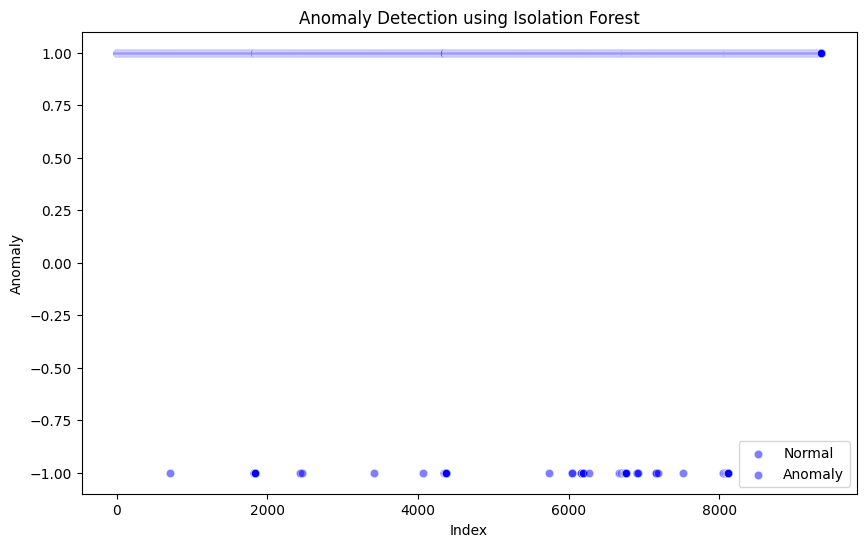

In [39]:
plt.figure(figsize=(10,6))
normal_data=feature[feature['anomaly']==1]
sns.scatterplot(x=normal_data.index,y=normal_data['anomaly'],color='blue',label='Normal',alpha=0.5)
anomalies=feature[feature['anomaly']==-1]
sns.scatterplot(x=anomalies.index,y=anomalies['anomaly'],color='blue',label='Anomaly',alpha=0.5)
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Anomaly')
plt.show()

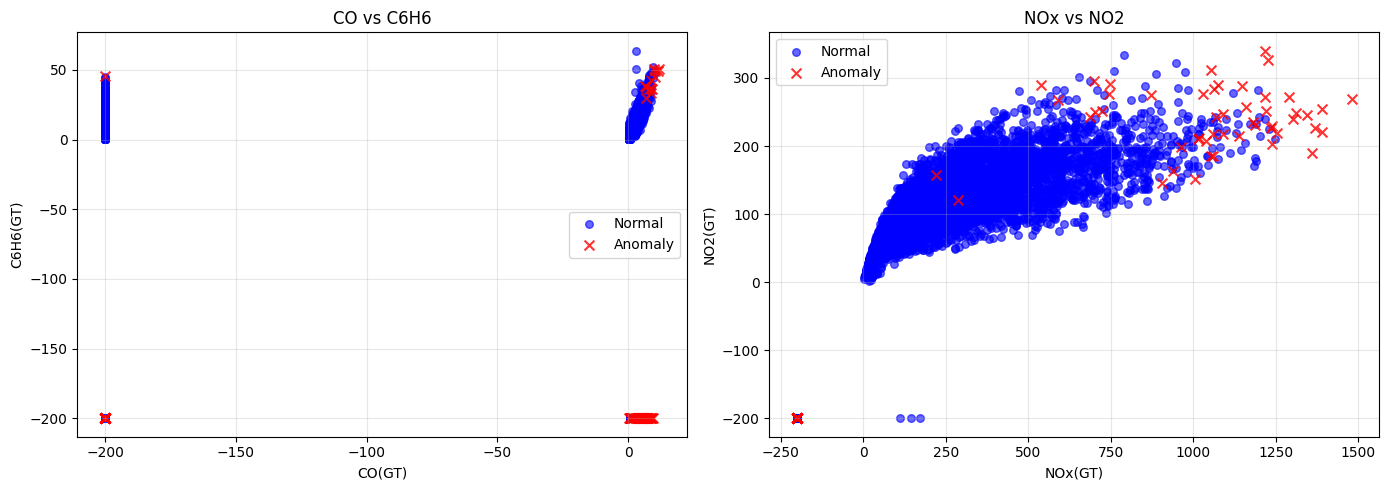

Normal data points: 9263
Anomalies detected: 94


In [45]:
# Visualize anomalies - Multiple feature comparisons
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
 
normal = feature[feature['anomaly'] == 1]
anomaly = feature[feature['anomaly'] == -1]
 
# Plot 1: CO vs C6H6
axes[0].scatter(normal['CO(GT)'], normal['C6H6(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[0].scatter(anomaly['CO(GT)'], anomaly['C6H6(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[0].set_xlabel('CO(GT)')
axes[0].set_ylabel('C6H6(GT)')
axes[0].set_title('CO vs C6H6')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
 
# Plot 2: NOx vs NO2
axes[1].scatter(normal['NOx(GT)'], normal['NO2(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[1].scatter(anomaly['NOx(GT)'], anomaly['NO2(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[1].set_xlabel('NOx(GT)')
axes[1].set_ylabel('NO2(GT)')
axes[1].set_title('NOx vs NO2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
 
plt.tight_layout()
plt.show()
 
print(f"Normal data points: {len(normal)}")
print(f"Anomalies detected: {len(anomaly)}")
 

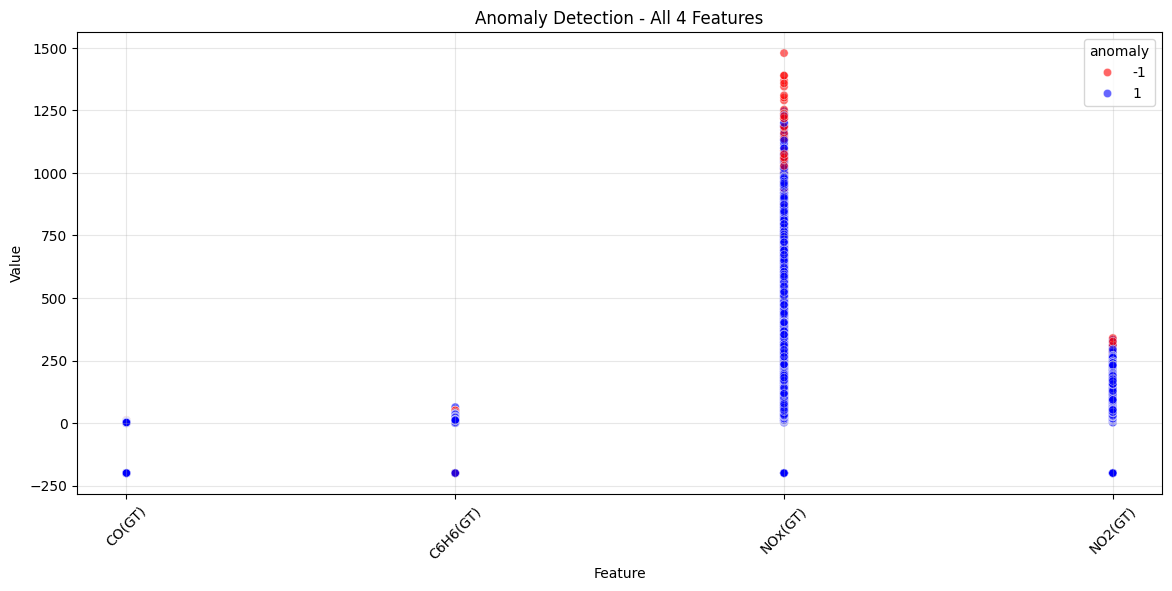

In [47]:
# Select features
cols = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

# Reshape data into long format
df_long = feature[cols + ['anomaly']].melt(
    id_vars='anomaly',
    var_name='Feature',
    value_name='Value'
)

plt.figure(figsize=(14,6))

sns.scatterplot(
    data=df_long,
    x='Feature',
    y='Value',
    hue='anomaly',
    palette={1: 'blue', -1: 'red'},
    alpha=0.6
)

plt.title("Anomaly Detection - All 4 Features")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


In [52]:
import plotly.graph_objects as go
import numpy as np
 
# Separate normal and anomaly
normal = feature[feature['anomaly'] == 1]
anomaly = feature[feature['anomaly'] == -1]
 
fig = go.Figure()
 
# Normal points
fig.add_trace(go.Scatter3d(
    x=normal['CO(GT)'],
    y=normal['C6H6(GT)'],
    z=normal['NOx(GT)'],
    mode='markers',
    name='Normal',
    marker=dict(
        size=6,
        color=normal['NO2(GT)'],   # 4th dimension as color
        colorscale='Blues',
        opacity=0.6,
        colorbar=dict(title='NO2(GT)')
    )
))
 
# Anomaly points
fig.add_trace(go.Scatter3d(
    x=anomaly['CO(GT)'],
    y=anomaly['C6H6(GT)'],
    z=anomaly['NOx(GT)'],
    mode='markers',
    name='Anomaly',
    marker=dict(
        size=8,
        color=anomaly['NO2(GT)'],
        colorscale='Reds',
        opacity=0.9,
        symbol='diamond'
    )
))
 
# Layout
fig.update_layout(
    title='4D Scatter Plot (Color = NO2(GT))',
    scene=dict(
        xaxis_title='CO(GT)',
        yaxis_title='C6H6(GT)',
        zaxis_title='NOx(GT)'
    ),
    width=900,
    height=700
)
 
fig.show()
 
 